<a href="https://colab.research.google.com/github/navyamodi30/T3/blob/main/T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/online_shoppers_intention.csv')
print(data)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

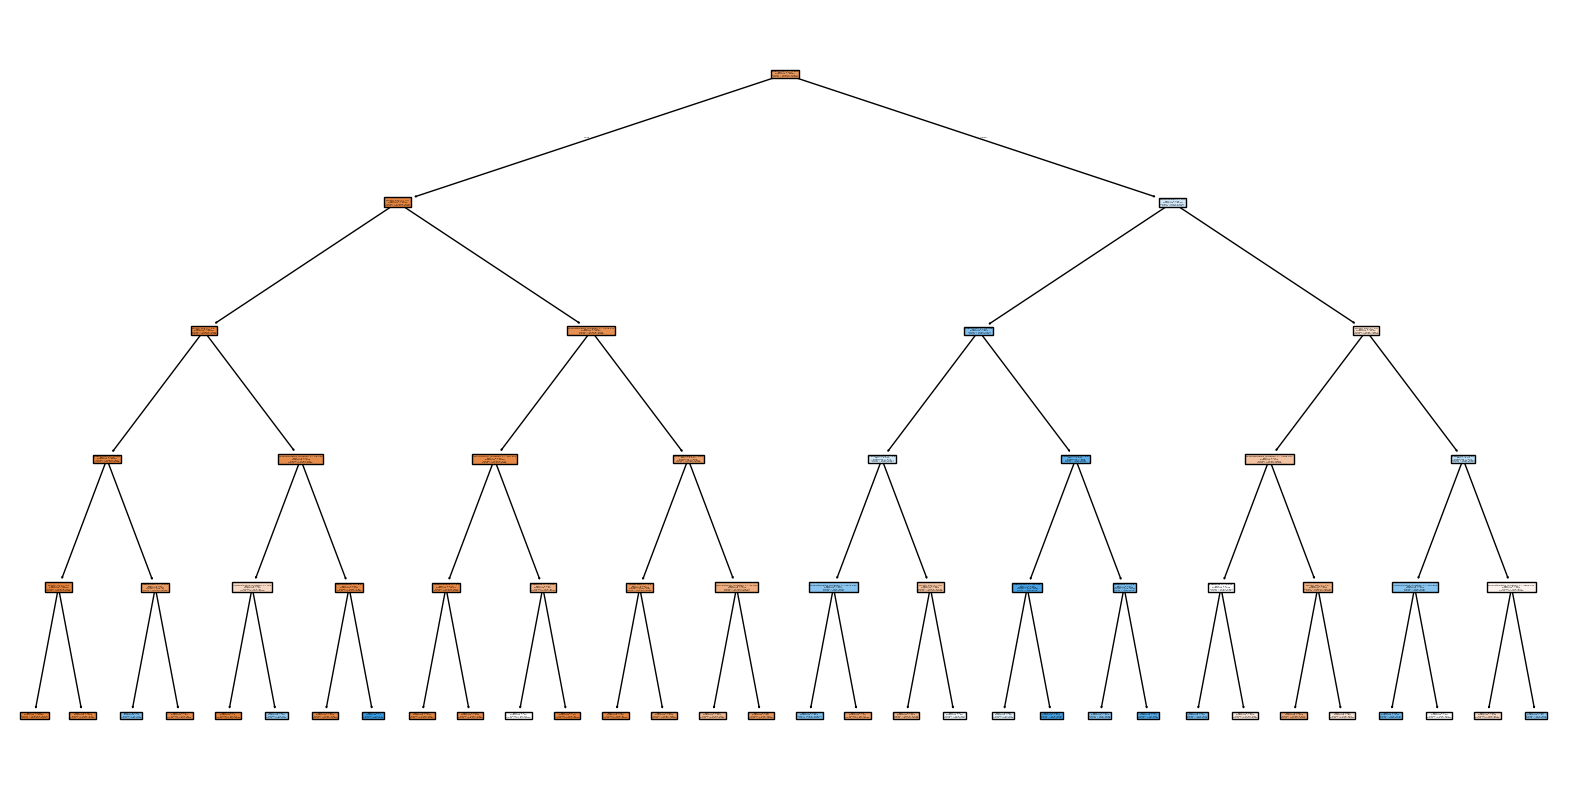

|--- PageValues <= 0.99
|   |--- Month_Nov <= 0.50
|   |   |--- Month_Sep <= 0.50
|   |   |   |--- PageValues <= 0.07
|   |   |   |   |--- Month_Jul <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Month_Jul >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- PageValues >  0.07
|   |   |   |   |--- PageValues <= 0.14
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PageValues >  0.14
|   |   |   |   |   |--- class: 0
|   |   |--- Month_Sep >  0.50
|   |   |   |--- ProductRelated_Duration <= 29.23
|   |   |   |   |--- Administrative_Duration <= 8.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Administrative_Duration >  8.80
|   |   |   |   |   |--- class: 1
|   |   |   |--- ProductRelated_Duration >  29.23
|   |   |   |   |--- Informational <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Informational >  8.50
|   |   |   |   |   |--- class: 1
|   |--- Month_Nov >  0.50
|   |   |--- ProductRelated_Duration <= 1179.57
|   |   |   |--- I

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Step 2: Explore and preprocess the data
print(data.info())
print(data.head())

# Handle missing values if any
data = data.dropna()

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define feature variables (X) and target variable (y)
X = data.drop(columns=['Revenue'])  # Assuming 'Revenue' is the target column
y = data['Revenue'].astype(int)     # Convert target to integers if necessary

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth as needed
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()

# Step 7: Export the tree as text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)
